<a href="https://colab.research.google.com/github/Walidsati/AAI614_Walid_sati/blob/main/Week%207/Notebook7.2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AAI614: Data Science & its Applications

*Notebook 7.2: Accelerating Data Science*

<a href="https://colab.research.google.com/github/harmanani/AAI614/blob/main/Week%207/Notebook7.2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Source: Data Science with Python and Dask

### Examining the Metadata of Dask Objects

You would need for this lab to downlaod the data and store on your local disk as it is arond 2GB with 42.3M Rows of Parking Ticket Data.  The data can be downloaded from [Kaggle](http://www.kaggle.com/new-york-city/nyc-parking-tickets/)

In [5]:
!pip install dask
import dask.dataframe as dd
from dask.diagnostics import ProgressBar
from matplotlib import pyplot as plt

df = dd.read_csv('Parking_Violations_Issued_-_Fiscal_Year_2017.csv',
                  dtype={'House Number': 'object', 'Time First Observed': 'object'})

df

,Summons Number,Plate ID,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Issuing Agency,Street Code1,Street Code2,Street Code3,Vehicle Expiration Date,Violation Location,Violation Precinct,Issuer Precinct,Issuer Code,Issuer Command,Issuer Squad,Violation Time,Time First Observed,Violation County,Violation In Front Of Or Opposite,House Number,Street Name,Intersecting Street,Date First Observed,Law Section,Sub Division,Violation Legal Code,Days Parking In Effect,From Hours In Effect,To Hours In Effect,Vehicle Color,Unregistered Vehicle?,Vehicle Year,Meter Number,Feet From Curb,Violation Post Code,Violation Description,No Standing or Stopping Violation,Hydrant Violation,Double Parking Violation
npartitions=1,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,int64,string,string,string,string,int64,string,string,string,int64,int64,int64,int64,float64,int64,int64,int64,string,string,string,string,string,string,string,string,string,int64,int64,string,string,string,string,string,string,float64,int64,string,int64,string,string,float64,float64,float64
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [6]:
missing_values = df.isnull().sum()
missing_values

Dask Series Structure:
npartitions=1
Date First Observed    int64
Violation Time           ...
dtype: int64
Dask Name: to_pyarrow_string, 6 graph layers

In [7]:
missing_count = ((missing_values / df.index.size) * 100)
missing_count

Dask Series Structure:
npartitions=1
Date First Observed    float64
Violation Time             ...
dtype: float64
Dask Name: mul, 11 graph layers

### Running Computations with the Compute Method

In [9]:
with ProgressBar():
  missing_count_pct = missing_count.compute()
missing_count_pct

[########################################] | 100% Completed | 8.99 s


,0
Summons Number,0.000000
Plate ID,0.006725
Registration State,0.000000
Plate Type,0.000000
Issue Date,0.000000
Violation Code,0.000000
Vehicle Body Type,0.379181
Vehicle Make,0.670076
Issuing Agency,0.000000
Street Code1,0.000000


In [10]:
columns_to_drop = missing_count_pct[missing_count_pct > 60].index
with ProgressBar():
    df_dropped = df.drop(columns_to_drop, axis=1).persist()

[########################################] | 100% Completed | 7.00 s


### Visualizing a Simple DAG using Dask Delayed Objects

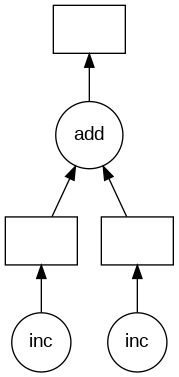

In [11]:
import dask.delayed as delayed
from dask.diagnostics import ProgressBar

def inc(i):
    return i + 1

def add(x, y):
    return x + y

x = delayed(inc)(1)
y = delayed(inc)(2)
z = delayed(add)(x, y)

z.visualize()

### Visualizing More Complex DAGs with Loops and Collections

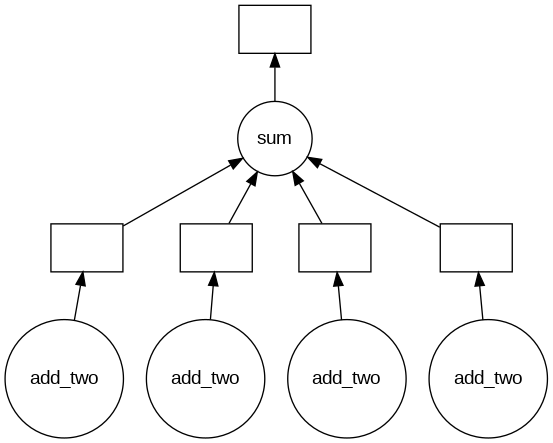

In [12]:
# Listing 2.7
def add_two(x):
    return x + 2

def sum_two_numbers(x,y):
    return x + y

def multiply_four(x):
    return x * 4

data = [1, 5, 8, 10]

step1 = [delayed(add_two)(i) for i in data]
total = delayed(sum)(step1)
total.visualize()

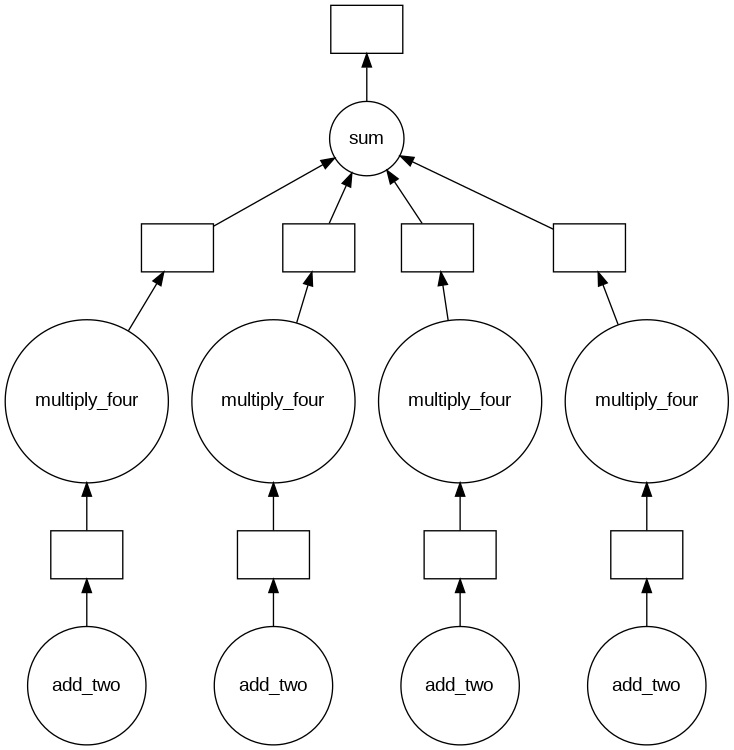

In [13]:
def add_two(x):
    return x + 2

def sum_two_numbers(x,y):
    return x + y

def multiply_four(x):
    return x * 4

data = [1, 5, 8, 10]

step1 = [delayed(add_two)(i) for i in data]
step2 = [delayed(multiply_four)(j) for j in step1]
total = delayed(sum)(step2)
total.visualize()

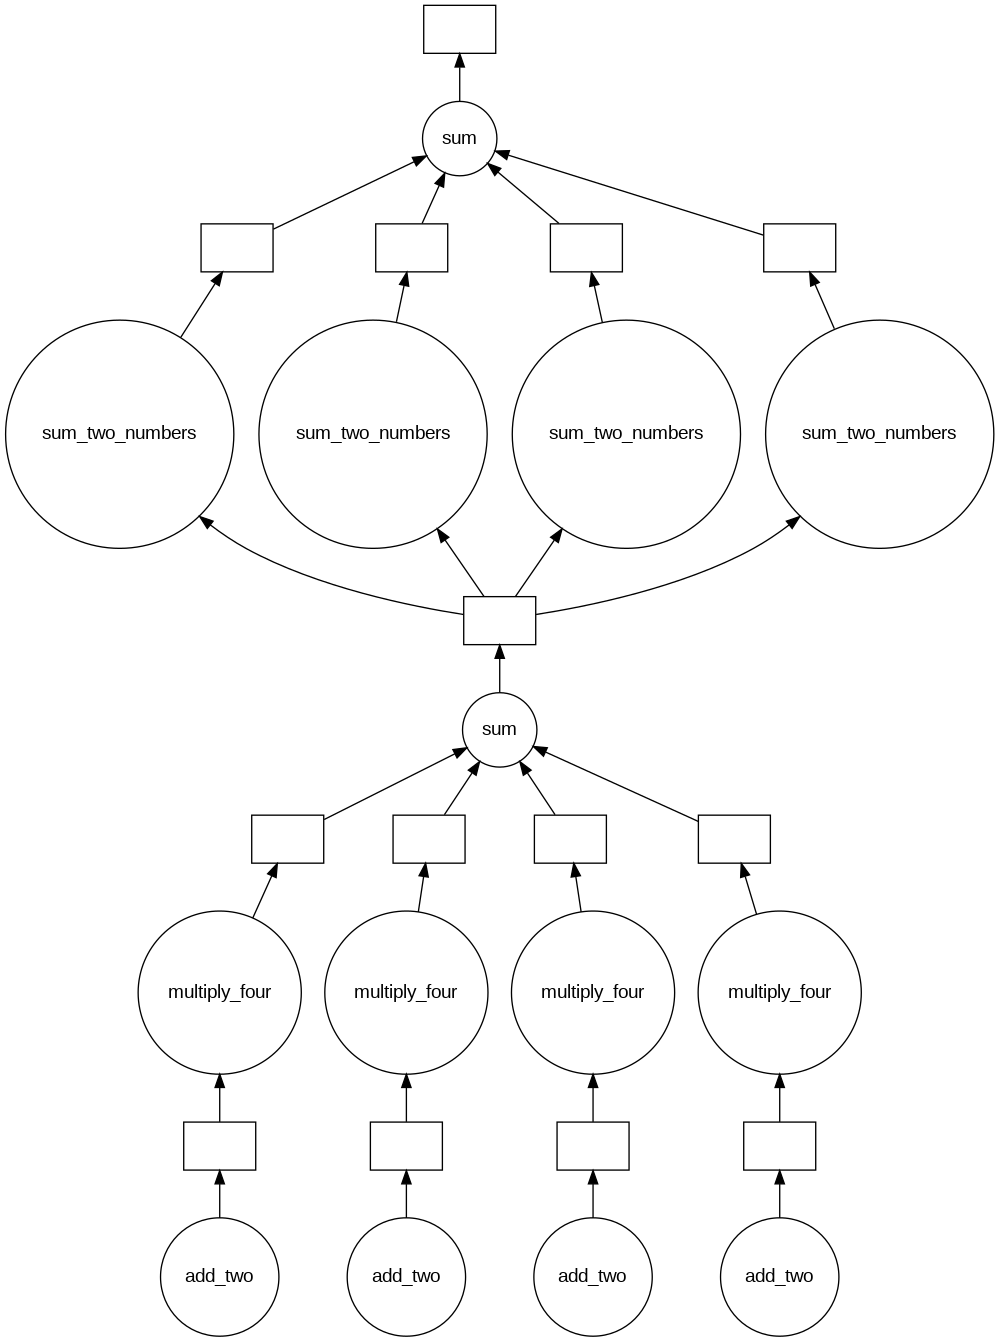

In [14]:
data2 = [delayed(sum_two_numbers)(k, total) for k in data]
total2 = delayed(sum)(data2)
total2.visualize()

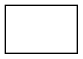

In [15]:
total_persisted = total.persist()
total_persisted.visualize()

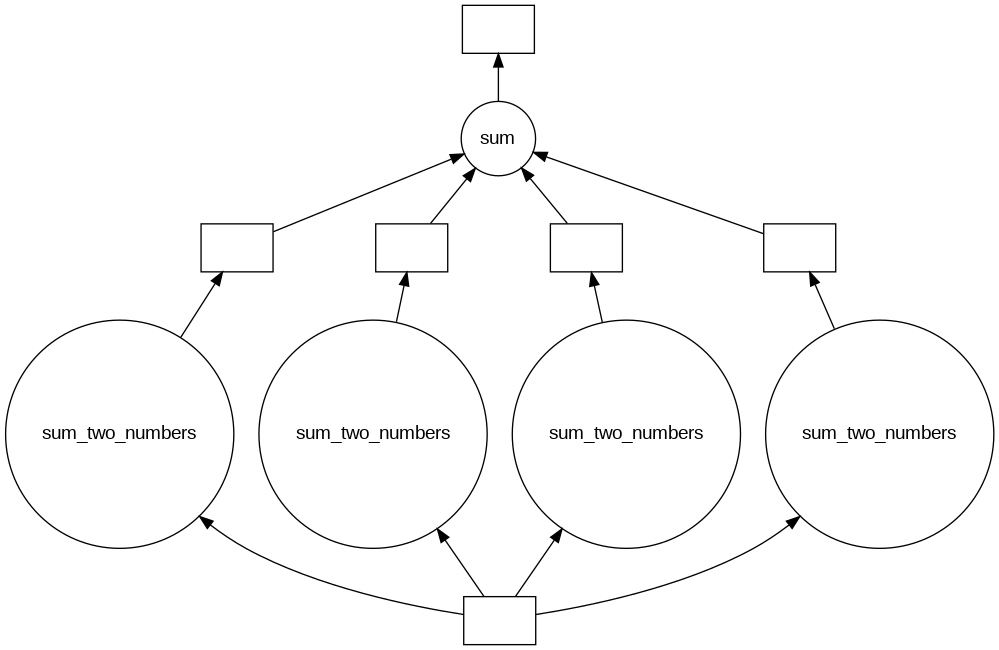

In [16]:
data2 = [delayed(sum_two_numbers)(l, total_persisted) for l in data]
total2 = delayed(sum)(data2)
total2.visualize()

In [ ]:
missing_count.visualize()